In [12]:
import sys
from scipy.odr import *
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import numpy as np
from matplotlib.pyplot import *
import fileread as fr
import predefined as pd
import wave_ops as wo
from scipy.optimize import curve_fit

path='../cur_data/'
data=pd.precuts(fr.gen_output(path+'Run_131-all.dat')[0])
for i in range(132,138):
    data=np.concatenate((data,pd.precuts(fr.gen_output(path+'Run_'+str(i)+'-all.dat')[0])))
data=pd.single_pixel(data,0,6)
data['energy']=(data['energy']+3.46)/6.28

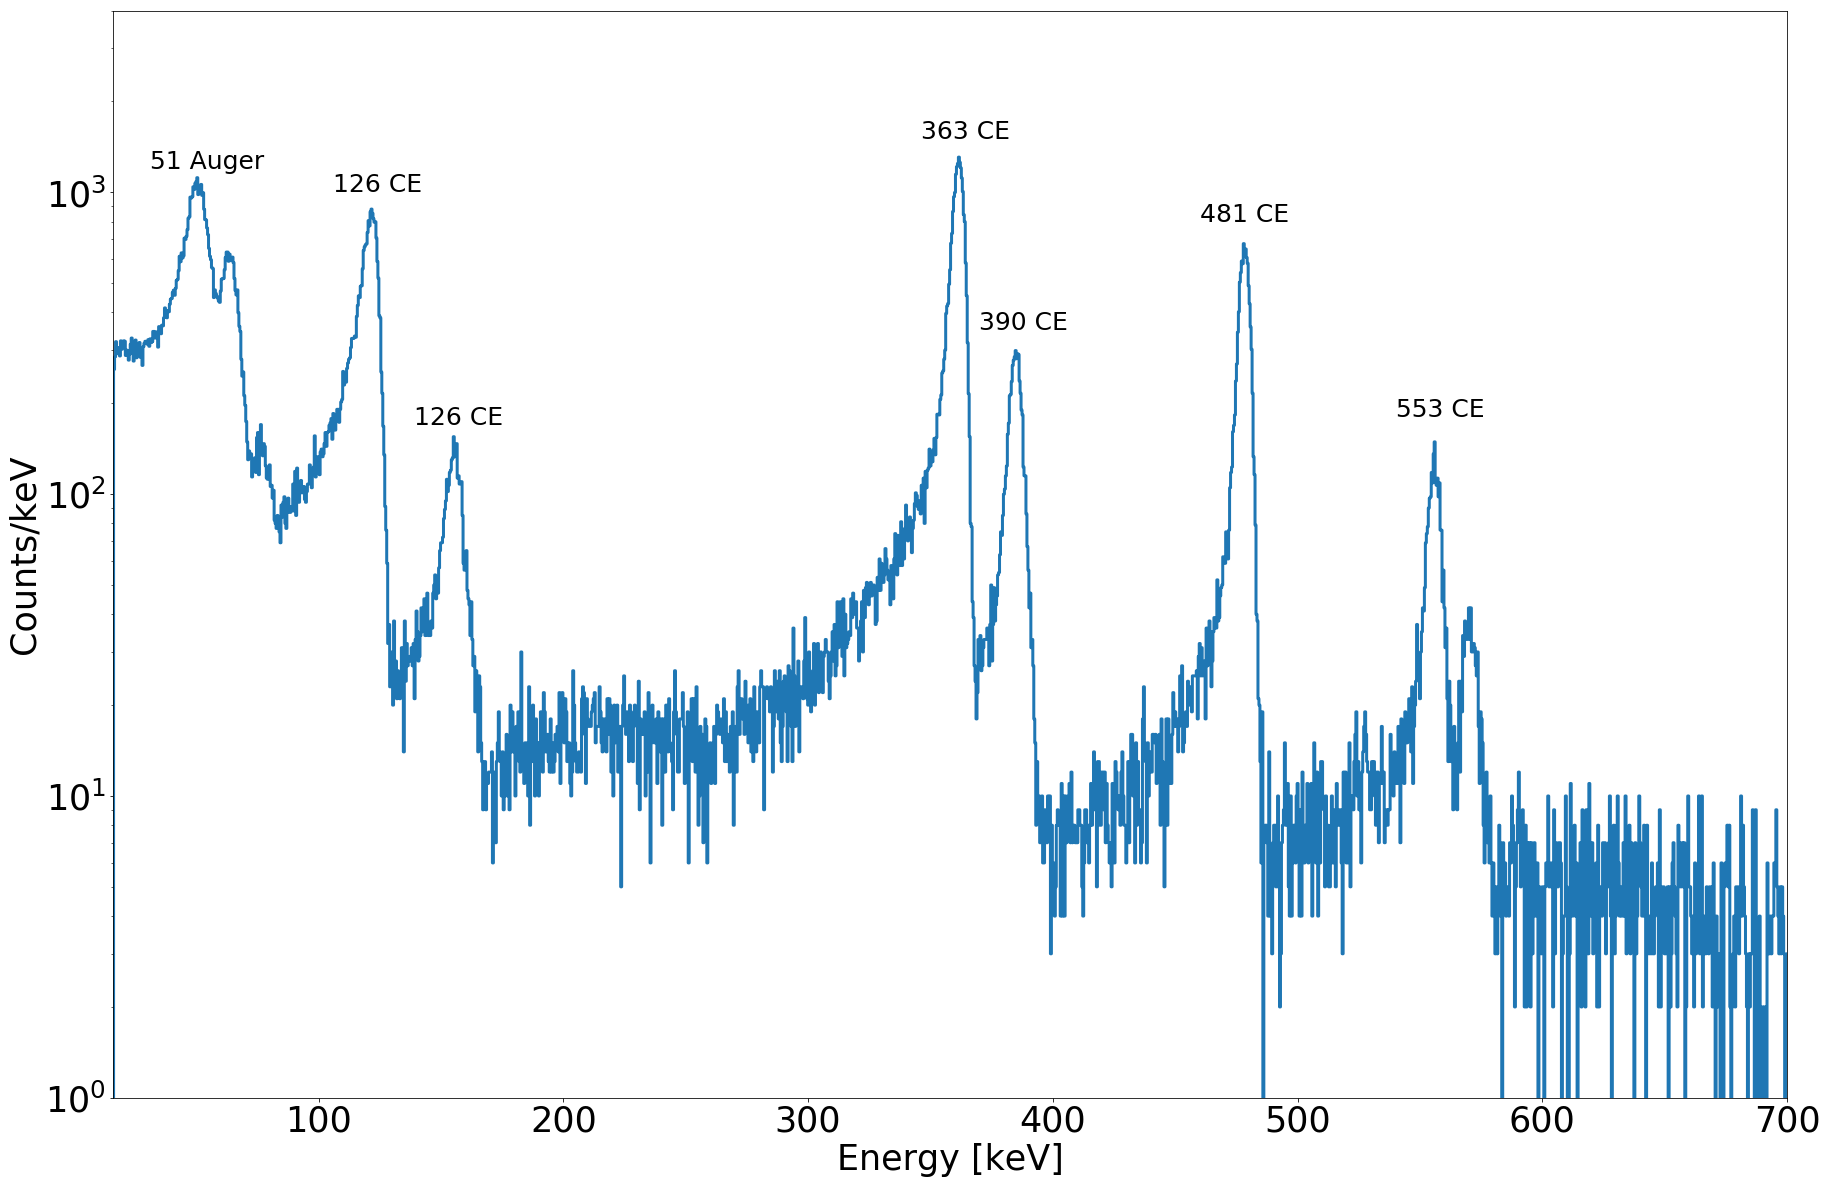

In [50]:
fs=35
ts=25
figure(figsize=(30,20))
lines=['363 CE', '390 CE', '481 CE', '553 CE','51 Auger','126 CE','159 CE']
hist,bins=np.histogram(data['energy'],bins=2000,range=[0,800])
bins=pd.cbins(bins)
plot(bins,hist,ls='steps',lw=3)
tick_params(labelsize=fs)
yscale('log')
xlabel('Energy [keV]',fontsize=fs)
ylabel('Counts/keV',fontsize=fs)
xlim(16,700)
ylim(1,4e3)
text(346,1.5e3,lines[0],fontsize=ts)
text(370,3.5e2,lines[1],fontsize=ts)
text(460,8.e2,lines[2],fontsize=ts)
text(540,1.8e2,lines[3],fontsize=ts)
text(31,1.2e3,lines[4],fontsize=ts)
text(106,1.e3,lines[5],fontsize=ts)
text(139,1.7e2,lines[5],fontsize=ts)
savefig('for_jason.pdf',fmt='pdf')
savefig('for_jason')
show()